In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('D:/100_days_ml/DATA/winequality-red.csv')

In [5]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
cols = list(df.columns)

In [9]:
y = df.quality

In [10]:
cols.remove('quality')

In [11]:
df = df[cols]

Mean normaliztion, so that

In [292]:
from sklearn import preprocessing

x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

In [293]:
y = (y - np.min(y)) / (np.max(y) - np.min(y))

In [294]:
X = np.array(df)

In [295]:
len(df)

1599

In [296]:
X0 = np.ones(shape = (len(df),1))

In [297]:
X0

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [298]:
X = np.concatenate((X0,X),axis = 1)

In [299]:
X

array([[1.        , 0.24778761, 0.39726027, ..., 0.60629921, 0.13772455,
        0.15384615],
       [1.        , 0.28318584, 0.52054795, ..., 0.36220472, 0.20958084,
        0.21538462],
       [1.        , 0.28318584, 0.43835616, ..., 0.40944882, 0.19161677,
        0.21538462],
       ...,
       [1.        , 0.15044248, 0.26712329, ..., 0.53543307, 0.25149701,
        0.4       ],
       [1.        , 0.11504425, 0.35958904, ..., 0.65354331, 0.22754491,
        0.27692308],
       [1.        , 0.12389381, 0.13013699, ..., 0.51181102, 0.19760479,
        0.4       ]])

# Solving via normal equation

In [300]:
A = np.dot(np.transpose(X),X)

In [301]:
A_inv = np.linalg.inv(A)

In [302]:
A_Xt = np.dot(A_inv,np.transpose(X))

In [303]:
thetas = np.dot(A_Xt,y)

In [304]:
thetas

array([ 0.5425106 ,  0.05647865, -0.31640836, -0.03651279,  0.04768731,
       -0.22453217,  0.06193093, -0.18477521, -0.04870829, -0.1050679 ,
        0.30605569,  0.35905701])

# Gradient Descent

In [305]:
y = np.array(y)

#thetas_g = np.ones(shape = (1,len(cols)+1))

thetas_g = np.random.rand(1,len(cols)+1)

alpha = 0.001

m =  len(df) 

lr_ratio = alpha/m

cf = []

itr = []


In [306]:
thetas_g.shape

(1, 12)

In [307]:
thetas_g

array([[0.63113502, 0.79714302, 0.56295682, 0.10562062, 0.83855021,
        0.67938294, 0.35299158, 0.7247466 , 0.39997437, 0.33103237,
        0.74878447, 0.40214815]])

In [308]:
for i in range(0,100000):
    for j in range(0,12):
        thetas_g[:,j] = thetas_g[:,j] - lr_ratio*(np.sum((np.dot(thetas_g,np.transpose(X)) - y) *  X[:,j]))   
    cf.append(lr_ratio*(np.sum(((np.dot(thetas_g,np.transpose(X))) - y)**2)))
    itr.append(i)

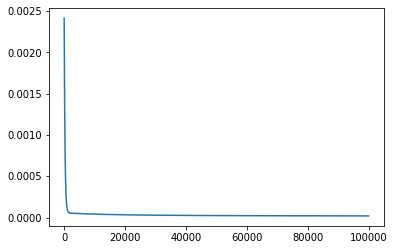

In [309]:
plt.plot(itr,cf)

In [310]:
thetas_g

array([[ 0.19713861,  0.44173032, -0.11726844, -0.07909343,  0.32395526,
         0.22824761, -0.08987571,  0.11641648, -0.2790801 ,  0.23179076,
         0.41632331,  0.40074291]])